# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from datetime import date
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Code found https://www.programiz.com/python-programming/datetime/current-datetime
# Finding current date for later plots.
today = date.today()
curr_date = today.strftime("%b-%d-%Y")

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# Set empty lists to hold cities with weather data, their lats and longs, their max temps humidities,
# cloudiness, wind speeds, countries and dates.

new_cities = []
latitudes = []
longitudes = []
max_temps = []
humidity = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

# Creating the base url and what units we want from the weather data API

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setting the output file name for a print log showing the names of the cities and whether they had weather data

output_file = "C://Python-API-Challenge/WeatherPy/Output_Data/city_log.txt"

# Opening the output print log to write data into it

with open(output_file, "w") as datafile:

    # Loop through each city
    
    for city in cities:
    
        # Create search query, make request and store in json
        
        query = f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query)
        response_json = response.json()
    
        # Try to grab the lat, long, max temp, humidity, cloudiness, wind speed, country and date
        # of cities if they are available in the Open Weather API.  Grab the city id for print log
        # add cities that do have weather data to a new list.
        
        try:
        
            latitudes.append(response_json['coord']['lat'])
            longitudes.append(response_json['coord']['lon'])
            max_temps.append(response_json['main']['temp_max'])
            humidity.append(response_json['main']['humidity'])
            cloudiness.append(response_json['clouds']['all'])
            wind_speeds.append(response_json['wind']['speed'])
            countries.append(response_json['sys']['country'])
            dates.append(response_json['dt'])
            city_id = response_json['id']
            new_cities.append(city.title())
            
            # Put the city and its id into the output txt file and also print the same values
        
            datafile.write(f"City ID: {city_id}\n")
            datafile.write(f"City Name: {city}\n\n")
        
            print(f"{city_id} {city} was found\n")
        
        # Handle exceptions for a city that is not available in the Open Weather API then write and print that a
        # particular city was not found.
        
        except KeyError:
        
            datafile.write(f"{city} not found\n\n")
            print(f"{city} not found\n")
            continue
    
    # Write and print the total number of cities that had weather data that were added to new list.

    datafile.write(f"Number of cities found: {len(new_cities)}")
    print(f"Number of cities found: {len(new_cities)}")

1015776 bredasdorp was found

1855476 nichinan was found

2126123 chokurdakh was found

2022572 khatanga was found

3874787 punta arenas was found

5106841 albany was found

rab not found

2075265 busselton was found

5855927 hilo was found

5234141 brattleboro was found

2163355 hobart was found

3831208 qaanaaq was found

6170031 tuktoyaktuk was found

5880054 barrow was found

2065594 mount isa was found

2158767 mareeba was found

2175403 blackwater was found

5882953 aklavik was found

5848280 kapaa was found

6201424 mataura was found

3366880 hermanus was found

4845585 westport was found

5866583 kodiak was found

5924351 clyde river was found

2972468 tonneins was found

2030065 mandalgovi was found

2070998 geraldton was found

1337606 eydhafushi was found

4030556 rikitea was found

2274895 monrovia was found

1513491 komsomolskiy was found

2175819 biloela was found

2751792 leeuwarden was found

3832899 viedma was found

3137469 sorland was found

1649150 bengkulu was foun

72181 marzuq was found

101312 turayf was found

bargal not found

4946620 palmer was found

2176639 batemans bay was found

6111696 port-cartier was found

1267390 kavaratti was found

3443061 chuy was found

1641977 kalianget was found

thano bula khan not found

1715015 dicabisagan was found

4031637 lavrentiya was found

1849892 tottori was found

bo not found

2077895 alice springs was found

3125897 castelldefels was found

3839982 punta alta was found

2012956 yerbogachen was found

2064735 nhulunbuy was found

245338 am timan was found

5110365 broome was found

2381334 atar was found

1214026 sabang was found

3372964 lagoa was found

4273680 junction city was found

64814 bandarbeyla was found

877631 namikupa was found

3893726 constitucion was found

1796663 bantou was found

1263528 marhaura was found

559752 gornozavodsk was found

2514216 manacor was found

933178 pandamatenga was found

1790894 wuxue was found

agva not found

2366168 kande was found

2137773 vao was fo

halalo not found

5380437 pacific grove was found

1259012 raichur was found

5000950 marquette was found

3396121 luis correia was found

1179450 dunyapur was found

5554072 juneau was found

2013727 vanavara was found

2161608 kensington was found

ruatoria not found

3728097 les cayes was found

2644210 liverpool was found

1786770 yibin was found

5915327 cap-aux-meules was found

3837213 san juan was found

bolungarvik not found

4362001 mayo was found

2209055 waddan was found

610298 beyneu was found

650769 kristiinankaupunki was found

tambul not found

535839 leshukonskoye was found

1293960 taunggyi was found

934322 mahebourg was found

tawnat not found

3904906 santa cruz was found

3392095 pimenteiras was found

3489440 morant bay was found

2127154 aniva was found

2270385 camacha was found

2172880 byron bay was found

2960869 youghal was found

Number of cities found: 579


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Creating dictionary with all the filled lists to be made into a dataframe.

weather_dict = {
    "City": new_cities,
    "Lat": latitudes,
    "Lng": longitudes,
    "Max Temp" : max_temps,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speeds,
    "Country" : countries,
    "Date" : dates
}
weather_data = pd.DataFrame(weather_dict)

# Code for writing city data to csv found https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
# Writing dataframe into a csv for next portion of assignment.

weather_data.to_csv(path_or_buf = "C://Python-API-Challenge/WeatherPy/Output_Data/new_cities.csv", index = False)

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,59.00,87,25,4.70,ZA,1609633639
1,Nichinan,31.60,131.37,44.60,45,20,10.29,JP,1609633640
2,Chokurdakh,70.63,147.92,-29.36,86,26,5.73,RU,1609633640
3,Khatanga,71.97,102.50,-23.31,83,41,9.64,RU,1609633443
4,Punta Arenas,-53.15,-70.92,51.80,62,0,23.04,CL,1609633640


In [25]:
# Describe method used to see statistics of all data pulled and also checking for erroneous data such as having
# over 100% humidity.

weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.00000,5.790000e+02
mean,20.160380,24.093696,49.355682,77.428325,56.193437,7.82152,1.609634e+09
std,32.612094,88.907740,32.015508,16.868193,38.388524,5.46635,8.898383e+01
min,-54.800000,-175.200000,-43.200000,1.000000,0.000000,0.16000,1.609633e+09
25%,-6.760000,-52.640000,33.010000,69.000000,20.000000,3.65500,1.609634e+09
50%,24.760000,26.690000,59.360000,81.000000,68.000000,6.93000,1.609634e+09
75%,47.320000,103.545000,75.560000,88.000000,92.500000,10.36500,1.609634e+09
max,78.220000,179.320000,92.590000,100.000000,100.000000,38.18000,1.609634e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
# Get the indices of cities that have humidity over 100%. and drop them from dataframe.

bad_humid = weather_data.loc[weather_data['Humidity'] > 100].index.to_list()
weather_data = weather_data.drop(index = bad_humid)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

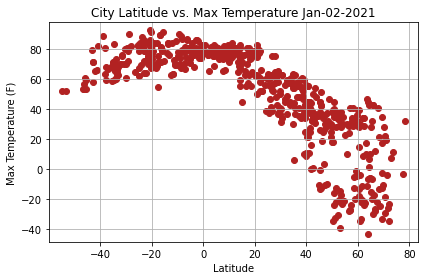

In [27]:
# Taking the needed columns of data for plotting the latitude vs temp scatter plot.

city_lats = weather_data['Lat']
city_max_temps = weather_data['Max Temp']

# Plotted the temperature by latitude into a scatter plot.

plt.scatter(city_lats, city_max_temps, marker='o', facecolors='firebrick')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_max_temps)-5, max(city_max_temps)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/LatvTemp_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

The scatter plot for City Latitude vs Max Temperature shows that the highest temperatures recorded are close to the equator and decreases gradually as we move north or south of the equator.  The shape is reminicient of a normal distribution bell curve.

## Latitude vs. Humidity Plot

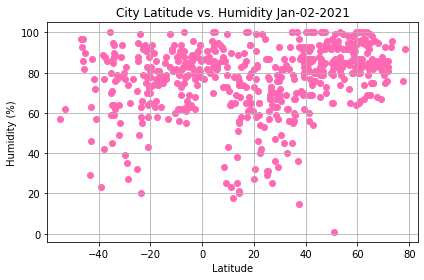

In [28]:
# Calling the needed data column for the latitude and humidity scatter plot

city_humid = weather_data['Humidity']

# Plotted the humidity by latitude into a scatter plot.

plt.scatter(city_lats, city_humid, marker='o', facecolors='hotpink')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_humid)-5, max(city_humid)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/LatvHumid_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

The scatter plot for City Latitude vs Humidity show that humidity is consistently higher near the equator as well as between 40-60.  Latitude 40 degrees and higher is known as the Humid Continental area due to less sunlight and cooler temps which results in higher humidity.

## Latitude vs. Cloudiness Plot

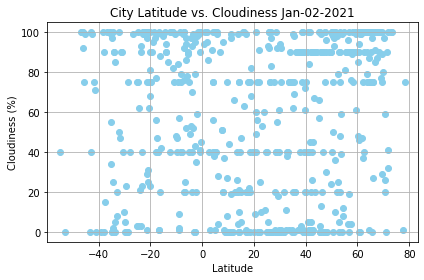

In [29]:
# Grabbing the needed data column for the latitude and cloudiness scatter plot

city_clouds = weather_data['Cloudiness']

# Plotted the cloudiness by latitude into a scatter plot.

plt.scatter(city_lats, city_clouds, marker='o', facecolors='skyblue')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_clouds)-5, max(city_clouds)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/LatvClouds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

For the scatter plot of City Latitude vs Cloudiness shows a disparity of cloud variance throughout the world above and below the equator.  It is hard to find a distinctive pattern from this data.

## Latitude vs. Wind Speed Plot

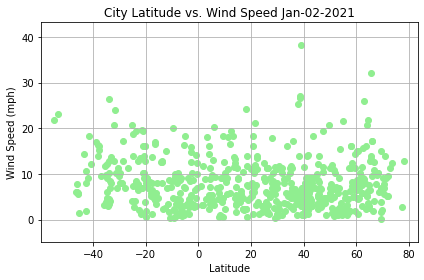

In [30]:
# Grabbing the needed data column for the latitude and wind speed scatter plot.

city_winds = weather_data['Wind Speed']

# Plotted the wind speed by latitude into a scatter plot.

plt.scatter(city_lats, city_winds, marker='o', facecolors='lightgreen')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_winds)-5, max(city_winds)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/LatvWinds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

For the scatter plot of City Latitude vs Wind Speed shows that both north and south of the equator there is a consistent wind speed between 0-10 mph.  There are several outliers farther away from the equator which may coincide with wind patterns in those areas resulting in stronger winds than usual.

## Linear Regression

In [31]:
# Creating two data frames from the data for all cities above the equator (Northern Hemisphere)
# and below the equator (Southern Hemisphere)

north_hem_weather = weather_data.loc[weather_data['Lat'] >= 0]
south_hem_weather = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8159226151242667


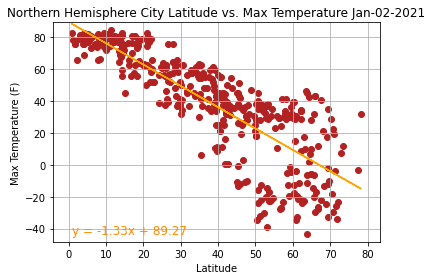

In [32]:
# Taking the needed columns of data from new northern hemisphere data frame for plotting the latitude vs temp scatter plot.

north_city_lats = north_hem_weather['Lat']
north_max_temps = north_hem_weather['Max Temp']

# Calculating values for the linear regression based on the data and creating a string of the resulting slope of the line.

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_max_temps)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the max temp by latitude into a scatter plot and the annotated regression line.

plt.scatter(north_city_lats, north_max_temps, marker='o', facecolors='firebrick')
plt.plot(north_city_lats, regress_values, "r-", color='orange')
plt.annotate(line_string, (min(north_city_lats), min(north_max_temps)), fontsize=12, color="darkorange")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_max_temps)-5, max(north_max_temps)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/NorthHem_LatvTemp_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5177822704685805


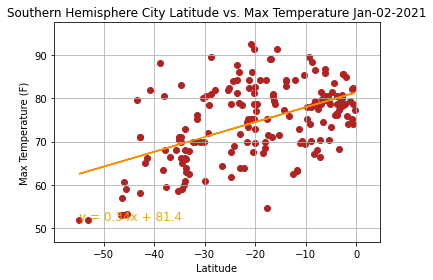

In [33]:
# Taking the needed columns of data from new southern hemisphere data frame for plotting the latitude vs temp scatter plot.

south_city_lats = south_hem_weather['Lat']
south_max_temps = south_hem_weather['Max Temp']

# Calculating values for the linear regression based on the data and creating a string of the resulting slope of the line.

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_max_temps)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the max temp by latitude into a scatter plot.

plt.scatter(south_city_lats, south_max_temps, marker='o', facecolors='firebrick')
plt.plot(south_city_lats, regress_values, "r-", color='darkorange')
plt.annotate(line_string,(min(south_city_lats), min(south_max_temps)), fontsize=12, color="orange")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_max_temps)-5, max(south_max_temps)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/SouthHem_LatvTemp_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.31207362362253827


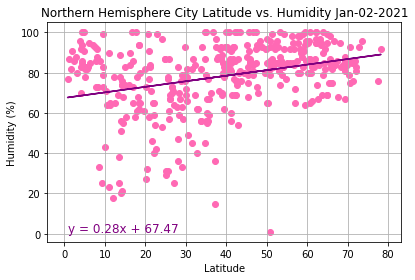

In [34]:
# Taking the needed column of data from new northern hemisphere data frame for plotting the latitude vs humidity scatter plot.

north_humid = north_hem_weather['Humidity']

# Calculating values for the linear regression based on the data and creating a string of the resulting slope of the line.

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_humid)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the humdity by latitude into a scatter plot.

plt.scatter(north_city_lats, north_humid, marker='o', facecolors='hotpink')
plt.plot(north_city_lats, regress_values, "r-", color='purple')
plt.annotate(line_string, (min(north_city_lats), min(north_humid)), fontsize=12, color="purple")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_humid)-5, max(north_humid)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/NorthHem_LatvHumid_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21448229654949208


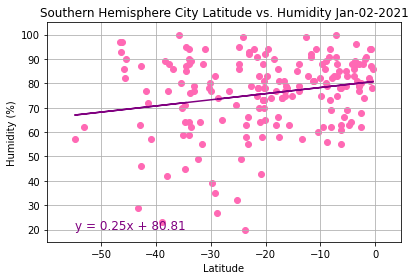

In [35]:
# Taking the needed column of data from new southern hemisphere data frame for plotting the latitude vs humidity scatter plot.

south_humid = south_hem_weather['Humidity']

# Calculating values for the linear regression based on the data and creating a string of the resulting slope of the line.

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_humid)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the humdity by latitude into a scatter plot.

plt.scatter(south_city_lats, south_humid, marker='o', facecolors='hotpink')
plt.plot(south_city_lats, regress_values, "r-", color='purple')
plt.annotate(line_string, (min(south_city_lats), min(south_humid)), fontsize=12, color="purple")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_humid)-5, max(south_humid)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/SouthHem_LatvHumid_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2845806899473928


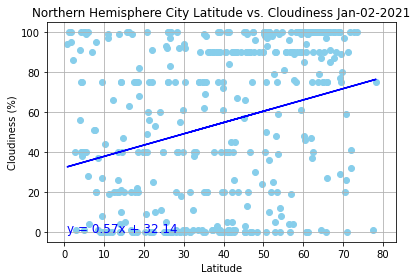

In [36]:
# Taking the needed column of data from new northern hemisphere data frame for plotting the latitude vs cloudiness scatter plot.

north_clouds = north_hem_weather['Cloudiness']

# Calculating values for the linear regression based on the data and creating a string of the resulting slope of the line.

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_clouds)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the cloudiness by latitude into a scatter plot.

plt.scatter(north_city_lats, north_clouds, marker='o', facecolors='skyblue')
plt.plot(north_city_lats, regress_values, "r-", color='blue')
plt.annotate(line_string, (min(north_city_lats), min(north_clouds)), fontsize=12, color="blue")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_clouds)-5, max(north_clouds)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/NorthHem_LatvClouds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1271446348711392


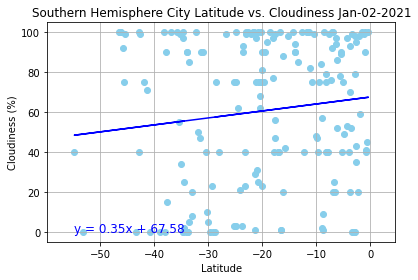

In [37]:
# Taking the needed column of data from new southern hemisphere data frame for plotting the latitude vs cloudiness scatter plot.

south_clouds = south_hem_weather['Cloudiness']

# Calculating values for the linear regression based on the data and creating a string of the resulting slope of the line.

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_clouds)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the cloudiness by latitude into a scatter plot.

plt.scatter(south_city_lats, south_clouds, marker='o', facecolors='skyblue')
plt.plot(south_city_lats, regress_values, "r-", color='blue')
plt.annotate(line_string, (min(south_city_lats), min(south_clouds)), fontsize=12, color="blue")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_clouds)-5, max(south_clouds)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/SouthHem_LatvClouds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.026486861149880872


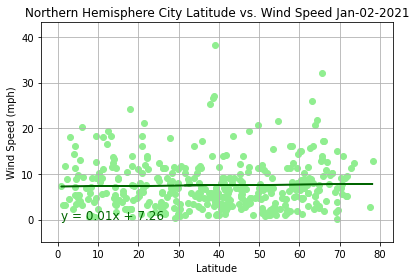

In [38]:
# Taking the needed column of data from new northern hemisphere data frame for plotting the latitude vs wind speed scatter plot.

north_winds = north_hem_weather['Wind Speed']

# Calculating values for the linear regression based on the data and creating a string of the resulting slope of the line.

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_winds)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the wind speed by latitude into a scatter plot.

plt.scatter(north_city_lats, north_winds, marker='o', facecolors='lightgreen')
plt.plot(north_city_lats, regress_values, "r-", color='darkgreen')
plt.annotate(line_string, (min(north_city_lats), min(north_winds)), fontsize=12, color="darkgreen")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_winds)-5, max(north_winds)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/NorthHem_LatvWinds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.31933543815221543


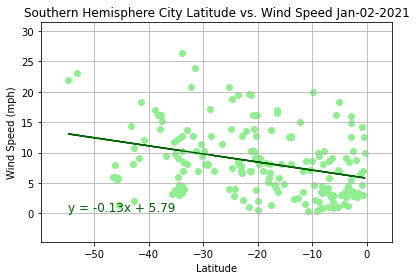

In [39]:
# Taking the needed column of data from new southern hemisphere data frame for plotting the latitude vs wind speed scatter plot.

south_winds = south_hem_weather['Wind Speed']

# Calculating values for the linear regression based on the data and creating a string of the resulting slope of the line.

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_winds)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the wind speed by latitude into a scatter plot.

plt.scatter(south_city_lats, south_winds, marker='o', facecolors='lightgreen')
plt.plot(south_city_lats, regress_values, "r-", color='darkgreen')
plt.annotate(line_string, (min(south_city_lats), min(south_winds)), fontsize=12, color="darkgreen")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_winds)-5, max(south_winds)+5)

plt.grid()

# Setting and output name and location for png image of scatter plot.

output_image = f'Output_Data/SouthHem_LatvWinds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()